In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 5)

# Introduction
K-Means is an unsupervised ML algorithm used to group data points into a predefined number of clusters. The "K" in K-Means is the number of clusters that is a predefined, and the algorithm clusters the data points into the defined K number of clusters. Meaning, the data points are classified into K clusters.

A training dataset of d-dimensions along with the K value is fed as input to the algorithm. For each of the row in the training data, the algorithm computes which cluster the data points belong to.

# K-Means Clustering
Consider a 2D dataset with K = 3, the 3 clusters are namely $S_1$, $S_2$ and $S_3$ with 3 centroids $C_1$, $C_2$ and $C_3$. In an ideal case,
- $S_1 \cup S_2 \cup S_3 = \text{Universal Set} = U$, and
- $S_1 \cap S_2 \cap S_3 = \text{Null Set} = \phi$

The above indicates that all of the data points belong to one or the other set and no data point exists in more than one set or cluster.

Now consider a set of points $S_i$ of size |$S_i$| (cardinality of the set). The centroid of this set can be found by summing all the points in the set (x_j) and averaging them by the size of the set (|$S_i$|). Mathematically,

$C_i$ = $\frac{1}{|S_i|} \sum{x_j} \backepsilon x_j \in S_i$

The "sum of data points" refers to the element-wise addition of all the data points within a cluster. For example, if a cluster has 3 data points,
- `x1 = [1, 2, 3]`
- `x2 = [4, 5, 6]`
- `x3 = [7, 8, 9]`

then, the sum of data points would be: `x1 + x2 + x3 = [1+4+7, 2+5+8, 3+6+9] = [12, 15, 18]`.

The goal is to find the centroids, $C_1$, $C_2$ and $C_3$, ..., $C_k$.

### How are clusters created using centroids?
Distance of a point is measured from all of the centroids, the point is then assigned to the cluster whose distance is the least from the centroid of that cluster.

### Mathematical formulation of K-Means
Given a dataset $D$, the goal is to find the clusters $S_1$, $S_2$ and $S_3$, ..., $S_k$ and their centroids, $C_1$, $C_2$ and $C_3$, ..., $C_k$ such that, the inter cluster distance is maximum (clear separation) and intra cluster distance is minimum (tight clustering).

Applying gradient descent does not help because, the result of gradient descent can be a fraction, and this does not help the case of clustering as data points can either belong to a cluster or not as a fractional value would mean that a data point would partially belong to a cluster. Also, in case the interger values are used to solve the optimization problem, the solution would have NP hard complexity.

To deal with the complexity problem, optimization is done using approximation algorithms. Lloyd's Algorithm is one such approximation algorithm.

### Lloyd's Algorithm
1. Initialization: From the given dataset $D$, $K$ points are picked at random, and are assumed to be the centroids. Let these be denoted as $C_1$, $C_2$ and $C_3$, ..., $C_k$.
2. Assignment: For each data point $x_i$ in the dataset, the distance of the data point from each of the $K$ centroids is computed. The centroid at the nearest is picked, let this be denoted as $C_j$. The point $x_i$ is assigned to the centroid $S_j$ which is associated with the centroid $C_j$.
3. Recompute the Centroid (update step): Now that all the data points have been grouped into their respective clusters, the centroid for each and every cluster is updated. The centroids are update using the equation, $C_i$ = $\frac{1}{|S_i|} \sum{x_j} \backepsilon x_j \in S_i$.
4. This assignment of data points to the cluster and updating the cluster centroids is repeated until convergence. The term convergence here points to the scenario where the cluster centroids do not change much.

# Scratch Implementation of K-Means Clustering on a Toy Dataset

In [3]:
# initializing the variables
data_size = 1000
num_iters = 5
num_clusters = 4

In [4]:
# initializing the data
from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples = 2000, centers = 4, n_features = 2, random_state = 0)

In [5]:
# initialize centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# creating a list to store what centroid is assigned to each cluster
assigned_centroids = np.zeros(len(data), dtype = np.int32)

In [6]:
# defining a method to compute the L2 distance
def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
        # Compute the difference, following by raising to power 2 and summing
        new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
        dist = np.hstack([dist,new_dist])
    return dist

In [7]:
# defining a method to extract the closest centroid
def extract_closest_centroid(x, centroids):
    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)
    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    return closest_centroid_index

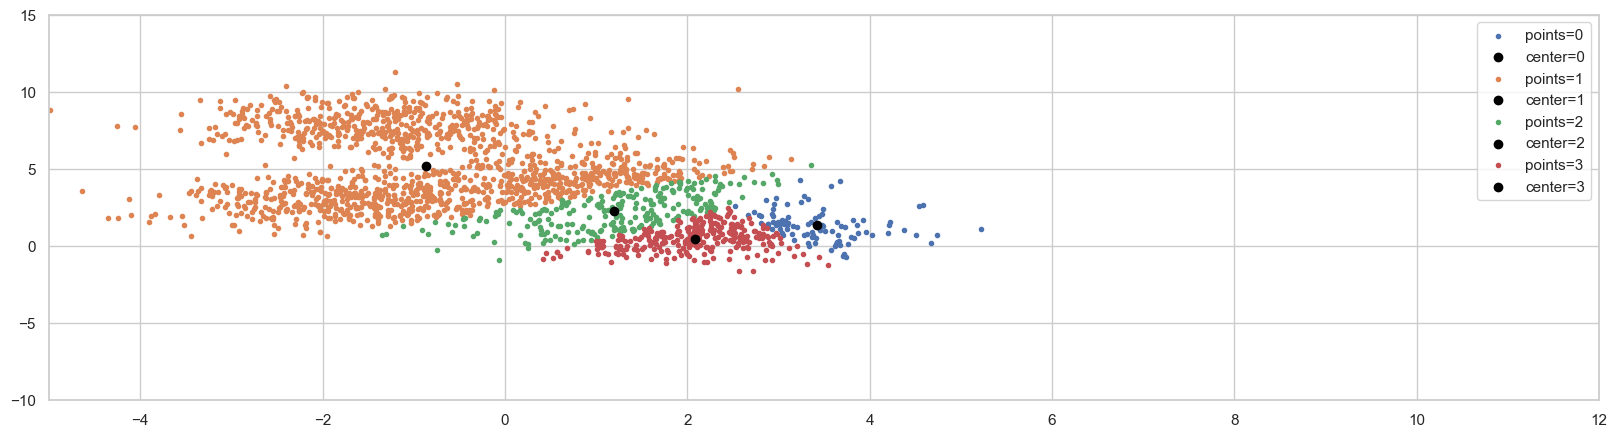

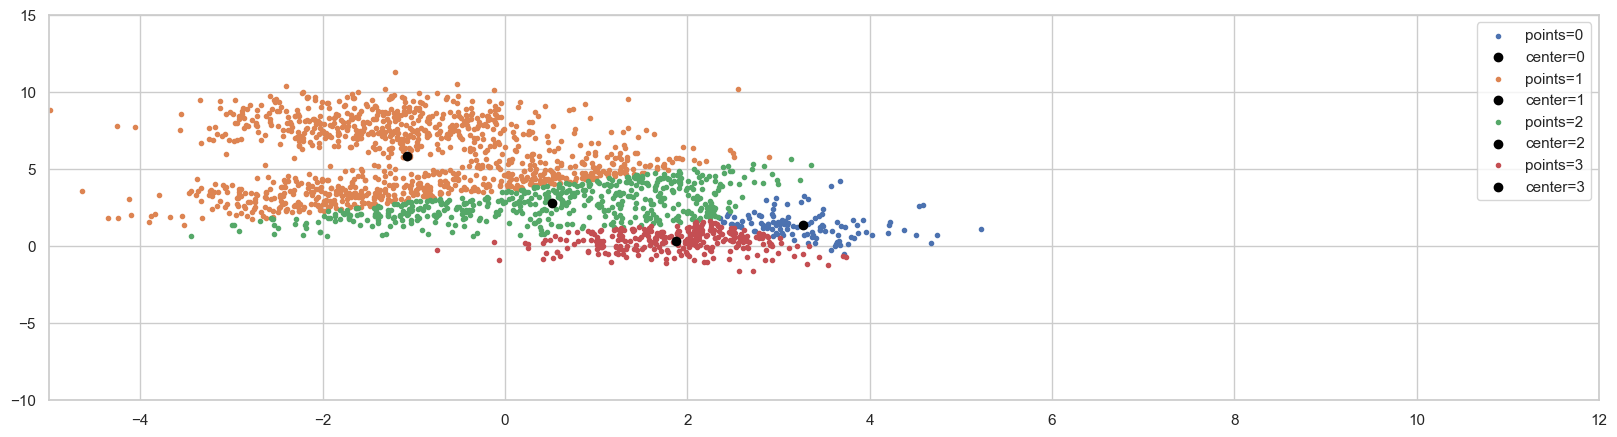

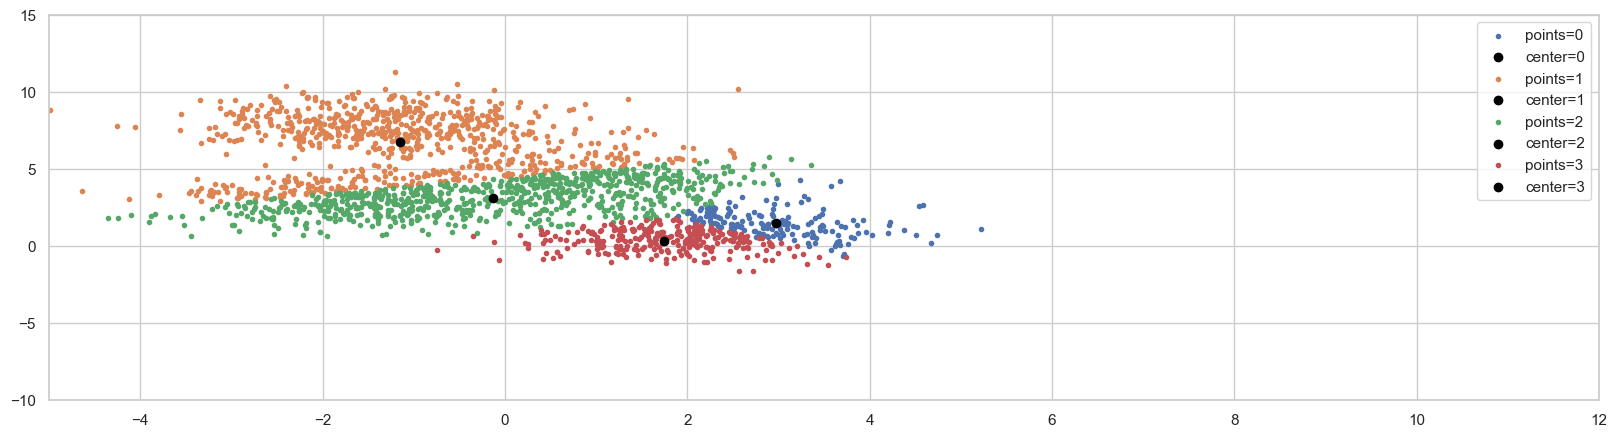

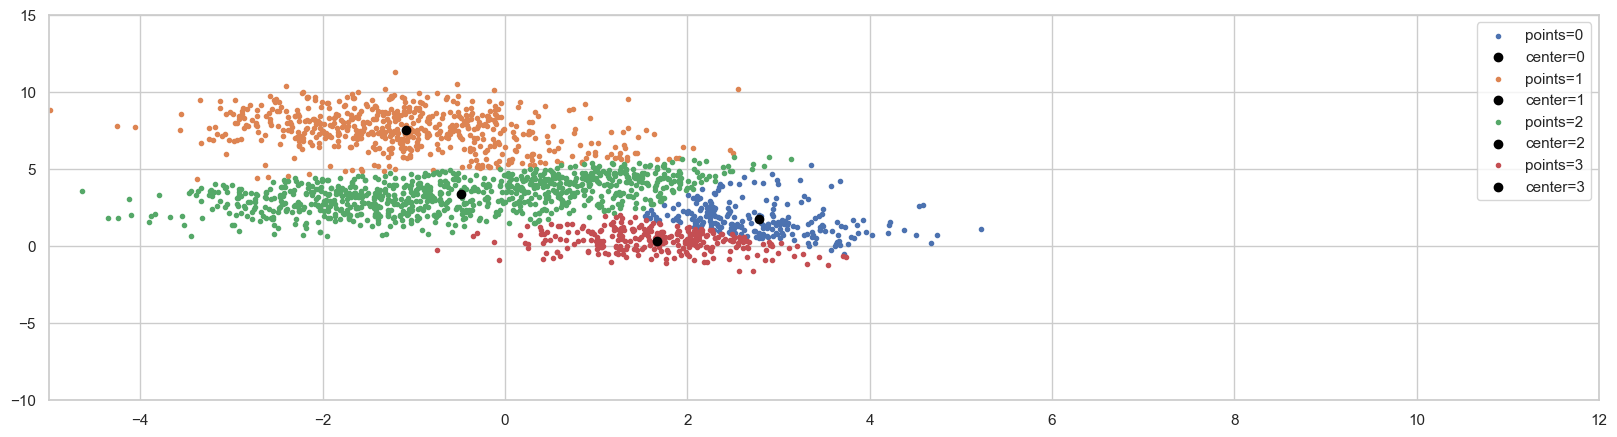

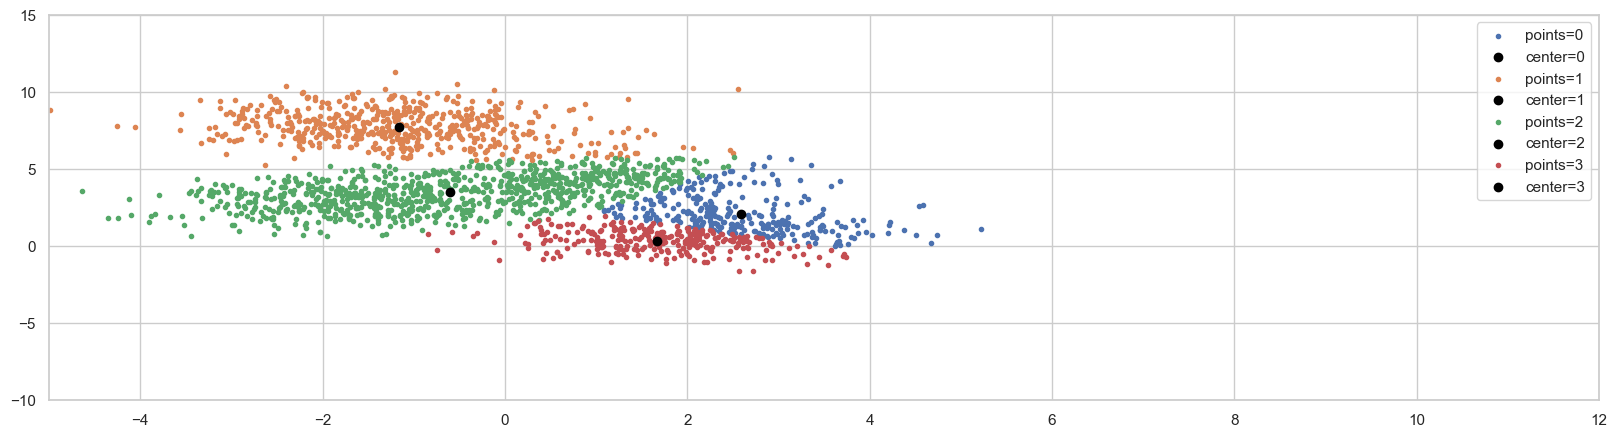

In [8]:
# Loop over iterations
for n in range(num_iters):
    # Get the closest centroid
    closest_centroid = extract_closest_centroid(data, centroids)
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        # assign the new centroid
        centroids[c] = new_centroid
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = ".", label = f"points={c}")
        plt.scatter(centroids[c][0], centroids[c][1], color = "black", label = f"center={c}")
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()